In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
% matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

churn = pd.read_excel('/Users/Kadibhai/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.xlsx',sheet_name=None)
churn.info()

/Users/Kadibhai/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


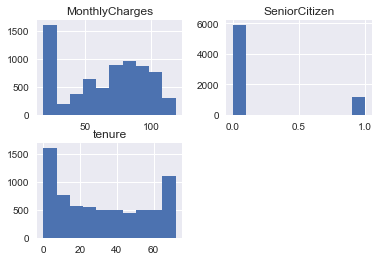

In [4]:
churn.hist()
churn.corr()

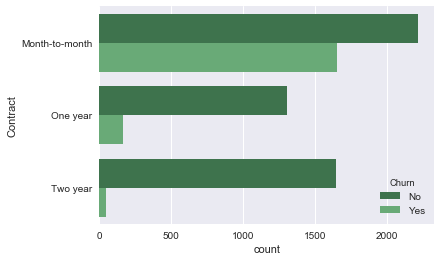

In [5]:
sns.countplot(y="Contract", hue="Churn", data=churn, palette="Greens_d")
plt.show()

In [6]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors='coerce', downcast='float')
churn.replace(["NaN", 'NaT'], np.nan, inplace = True)

churn = churn.dropna()

## check for balance 
churn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [7]:
y = churn['Churn']
y = y.replace(['Yes','No'],[1,0])

cat_vars = pd.get_dummies(churn.select_dtypes(include=['object']).drop(['Churn','customerID'],axis=1),drop_first=True)

num_vars = churn.select_dtypes(include=['float64','float32','int64'])

X = pd.concat((cat_vars,num_vars),axis=1)


### SelectKBest

X_new = SelectKBest(chi2, k=10).fit_transform(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier()

param_grid = [
          {'n_estimators': [100,200],'max_depth': [2,1],'loss': ['deviance'],'subsample': [0.1,.2]},
          {'n_estimators': [100,200],'subsample': [0.1,.2], 'loss':['exponential']},
]

# Initialize and train our tree.

grid_search = GridSearchCV(clf, param_grid,
 scoring='accuracy', n_jobs = -1,verbose=1)

grid_search.fit(X_train, y_train)

GBC_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    7.5s finished


In [10]:
y_pred = cross_val_predict(GBC_model, X_test, y_test, cv=5)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1033
          1       0.63      0.43      0.51       374

avg / total       0.77      0.78      0.77      1407



In [11]:
confusion_matrix(y_test, y_pred)

array([[937,  96],
       [212, 162]])

In [20]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.54      0.69      1033
          1       0.41      0.89      0.57       374

avg / total       0.80      0.64      0.65      1407



In [21]:
confusion_matrix(y_test, y_pred)

array([[560, 473],
       [ 40, 334]])

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = tree.DecisionTreeClassifier()

param_grid = [
            {'criterion':['gini'],'max_features': [1,2],'splitter': ['random'],'class_weight' : ['balanced']},
            {'criterion':['entropy'],'max_features': [1,2],'class_weight' : ['balanced'],'splitter': ['random']}
]

# Initialize and train our tree.

grid_search = GridSearchCV(decision_tree, param_grid,
 scoring='accuracy',n_jobs=-1,verbose=1)

grid_search.fit(X_train, y_train)

Decision_model = grid_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


In [9]:
y_pred = cross_val_predict(Decision_model, X_test, y_test, cv=5)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.81      0.81      1033
          1       0.46      0.45      0.46       374

avg / total       0.71      0.72      0.71      1407



In [10]:
confusion_matrix(y_test, y_pred)

array([[838, 195],
       [205, 169]])

In [17]:
rfc = ensemble.RandomForestClassifier()

param_grid = [
    {'n_estimators': [100, 10, 30], 'max_features': [2, 4, 6, 8],'class_weight': ["balanced"]},
{'bootstrap': [False], 'n_estimators': [20, 10], 'max_features': [2, 3, 4],'class_weight': ["balanced"]}
]

grid_search = GridSearchCV(rfc, param_grid, cv=5,
 scoring='accuracy')

grid_search.fit(X_train, y_train)

RFC_model = grid_search.best_estimator_

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(RFC_model, X_test, y_test, cv=10)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84      1033
          1       0.57      0.43      0.49       374

avg / total       0.74      0.76      0.75      1407



In [23]:
confusion_matrix(y_test, y_pred)

array([[910, 123],
       [214, 160]])

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

param_grid = [
            {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
]
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
 scoring='accuracy',n_jobs=-1)

y_pred = cross_val_predict(grid_search, X_test, y_test, cv=3)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1033
          1       0.64      0.47      0.54       374

avg / total       0.78      0.79      0.78      1407



In [25]:
confusion_matrix(y_test, y_pred)

array([[936,  97],
       [200, 174]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [2, 3, 4, 5]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 out of  40 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.1s finished


In [27]:
y_pred = cross_val_predict(final_model, X_test, y_test, cv=10)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.92      0.85      1033
          1       0.58      0.29      0.39       374

avg / total       0.73      0.76      0.73      1407



In [28]:
confusion_matrix(y_test, y_pred)

array([[954,  79],
       [265, 109]])

In [ ]:
from sklearn.svm import SVC

clf = SVC()

param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear'],'class_weight':['balanced', None]},
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'],'class_weight':['balanced', None]},
 ]
grid_search = GridSearchCV(clf, param_grid, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

In [ ]:
y_pred = cross_val_predict(final_model, X_test, y_test, cv=10)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

pca.explained_variance_ratio_

In [30]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(principalDf,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1337,
            splitter='best')

0.7431796951533794